In [3]:
# Some imports we will need below
import numpy as np
from devito import *
import matplotlib.pyplot as plt 

In [4]:
nx, ny = 100, 100
grid = Grid(shape=(nx, ny))

In [5]:
x, y = grid.dimensions
t = grid.stepping_dim

In [6]:
u = TimeFunction(name='u', grid=grid, space_order=2, save=200)
c = Constant(name='c')
c2= Constant(name='c2')
pres = Constant(name='pres')

In [7]:
# iteration format of diffusion equation
eqn = Eq(u.dt, c * u.laplace + c2 * (pres - u))
# eqn = Eq(u.dt, c * u.laplace)
stencil = Eq(u.forward, solve(eqn, u.forward))

In [8]:
eqn

Eq(Derivative(u(time, x, y), time), c*(Derivative(u(time, x, y), (x, 2)) + Derivative(u(time, x, y), (y, 2))) + c2*(pres - u(time, x, y)))

In [19]:
stencil

Eq(u(time + dt, x, y), dt*(c*(Derivative(u(time, x, y), (x, 2)) + Derivative(u(time, x, y), (y, 2))) + u(time, x, y)/dt))

In [20]:
# create initial condition
init_matrix = np.ones((nx, ny), dtype=np.float64) * 100
init_matrix[nx//2, ny//2] = 0
u.data[0,:,:] = init_matrix
# create boundary condition
bc = [Eq(u[t+1, 0,    y],    u[t+1, 1,    y])]
bc+= [Eq(u[t+1, nx-1, y],    u[t+1, nx - 2, y])]
bc+= [Eq(u[t+1, x, ny-1],    u[t+1, x, ny - 2])]
bc+= [Eq(u[t+1, x,    0],    u[t+1, x,    1])]

# create force term
ft = [Eq(u[t+1,nx//2, ny//2], 0)]

In [21]:
op = Operator([stencil] + bc + ft,subdomain=grid.interior)

In [22]:
# stats = op.apply(dt=1e-1, c=1e-04, c2=1e-05, pres=100)
stats = op.apply(dt=1e-1, c=1e-04)

Operator `Kernel` ran in 0.01 s


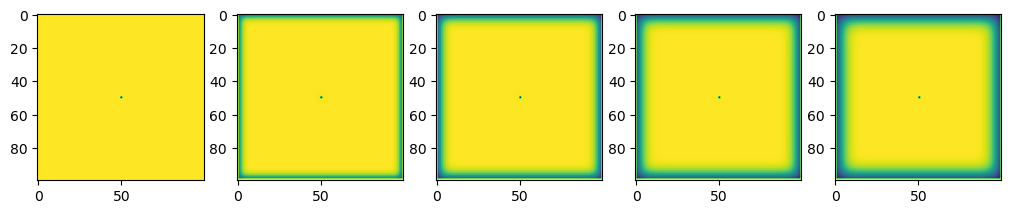

In [23]:
plt.figure(figsize=(15,40))
for i in range(1, 6):
    plt.subplot(1, 6, i)
    plt.imshow(u.data[(i-1)*40])
plt.show()

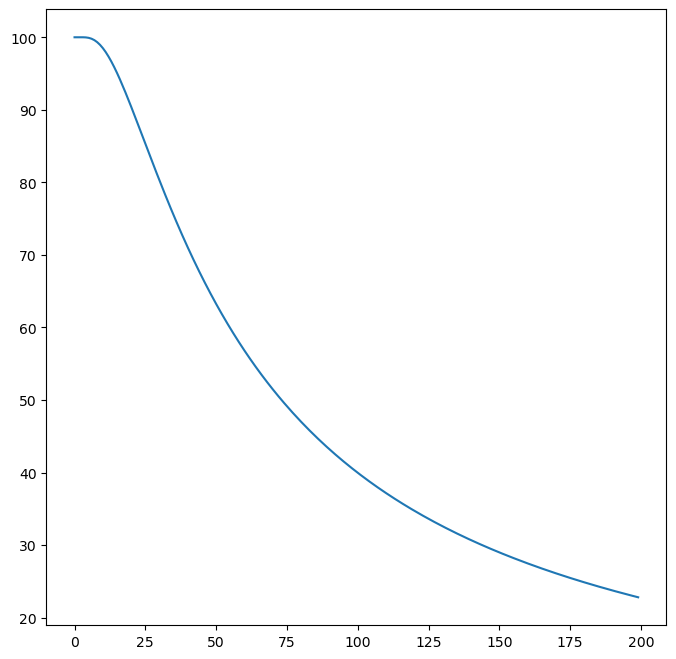

In [24]:
plt.figure(figsize=(8,8))
plt.plot(u.data[:,96,96], label='center')
plt.show()